In [2]:
!pip install statsmodels

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [4]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import itertools
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# metrics
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import dill

In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/climate_data_nepal_district_wise_daily_part_i.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/climate_data_nepal_district_wise_daily_part_ii.csv')
df= pd.concat([df1,df2])
df

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441559,12/27/2019,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
441560,12/28/2019,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
441561,12/29/2019,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
441562,12/30/2019,Udayapur,26.9,86.5,0.00,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06


In [2]:
# df1 = pd.read_csv('../Dataset/climate_data_nepal_district_wise_daily_part_i.csv')
# df2 = pd.read_csv('../Dataset/climate_data_nepal_district_wise_daily_part_ii.csv')
# df= pd.concat([df1,df2])
# df= pd.concat([df1,df2])

In [3]:
df =  df[df['DISTRICT'] == 'Kathmandu']
df

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
413076,1/1/1981,Kathmandu,27.7,85.3,0.00,84.02,4.10,47.94,9.04,-1.96,...,10.98,6.15,1.74,4.35,0.50,3.85,1.75,3.71,0.68,3.03
413077,1/2/1981,Kathmandu,27.7,85.3,0.00,84.08,4.25,49.83,9.00,-1.47,...,10.06,6.06,1.53,3.96,0.35,3.62,1.48,3.21,0.33,2.88
413078,1/3/1981,Kathmandu,27.7,85.3,0.00,84.04,4.72,55.99,8.84,0.11,...,9.41,6.58,1.71,3.70,0.49,3.21,1.80,3.14,0.65,2.49
413079,1/4/1981,Kathmandu,27.7,85.3,0.01,83.96,4.78,60.71,7.81,0.27,...,9.32,6.16,1.86,4.01,0.61,3.40,1.98,3.48,0.89,2.59
413080,1/5/1981,Kathmandu,27.7,85.3,0.34,83.96,4.67,60.83,7.42,-0.08,...,9.21,5.91,1.82,3.75,0.37,3.38,2.04,3.44,0.49,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427315,12/27/2019,Kathmandu,27.7,85.3,0.00,84.01,3.32,54.14,4.21,-5.34,...,10.81,1.61,1.85,3.69,1.07,2.62,2.00,3.50,1.05,2.45
427316,12/28/2019,Kathmandu,27.7,85.3,0.00,84.27,3.14,50.06,4.57,-5.45,...,14.46,2.01,2.16,3.53,0.84,2.69,2.22,3.90,0.96,2.94
427317,12/29/2019,Kathmandu,27.7,85.3,0.00,84.33,3.33,44.74,7.06,-4.67,...,10.43,2.93,1.76,3.22,0.80,2.42,1.85,2.55,1.01,1.54
427318,12/30/2019,Kathmandu,27.7,85.3,0.00,84.39,3.36,44.56,7.25,-4.55,...,10.50,3.17,1.63,3.07,0.44,2.63,1.66,2.54,0.51,2.03


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [5]:
df

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,YEAR,MONTH,DAY
413076,1981-01-01,Kathmandu,27.7,85.3,0.00,84.02,4.10,47.94,9.04,-1.96,...,4.35,0.50,3.85,1.75,3.71,0.68,3.03,1981,1,1
413077,1981-01-02,Kathmandu,27.7,85.3,0.00,84.08,4.25,49.83,9.00,-1.47,...,3.96,0.35,3.62,1.48,3.21,0.33,2.88,1981,1,2
413078,1981-01-03,Kathmandu,27.7,85.3,0.00,84.04,4.72,55.99,8.84,0.11,...,3.70,0.49,3.21,1.80,3.14,0.65,2.49,1981,1,3
413079,1981-01-04,Kathmandu,27.7,85.3,0.01,83.96,4.78,60.71,7.81,0.27,...,4.01,0.61,3.40,1.98,3.48,0.89,2.59,1981,1,4
413080,1981-01-05,Kathmandu,27.7,85.3,0.34,83.96,4.67,60.83,7.42,-0.08,...,3.75,0.37,3.38,2.04,3.44,0.49,2.95,1981,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427315,2019-12-27,Kathmandu,27.7,85.3,0.00,84.01,3.32,54.14,4.21,-5.34,...,3.69,1.07,2.62,2.00,3.50,1.05,2.45,2019,12,27
427316,2019-12-28,Kathmandu,27.7,85.3,0.00,84.27,3.14,50.06,4.57,-5.45,...,3.53,0.84,2.69,2.22,3.90,0.96,2.94,2019,12,28
427317,2019-12-29,Kathmandu,27.7,85.3,0.00,84.33,3.33,44.74,7.06,-4.67,...,3.22,0.80,2.42,1.85,2.55,1.01,1.54,2019,12,29
427318,2019-12-30,Kathmandu,27.7,85.3,0.00,84.39,3.36,44.56,7.25,-4.55,...,3.07,0.44,2.63,1.66,2.54,0.51,2.03,2019,12,30


In [ ]:
def plot_vars(df,x,y,YEAR):
    fig,ax=plt.subplots(figsize=(20,10))

    sns.lineplot(
        ax=ax,
        data=df,
        x=x,
        y=y,
        hue=YEAR,
        palette='dark',
        legend=False

    )

    plt.savefig(f'{x} VS {y}')

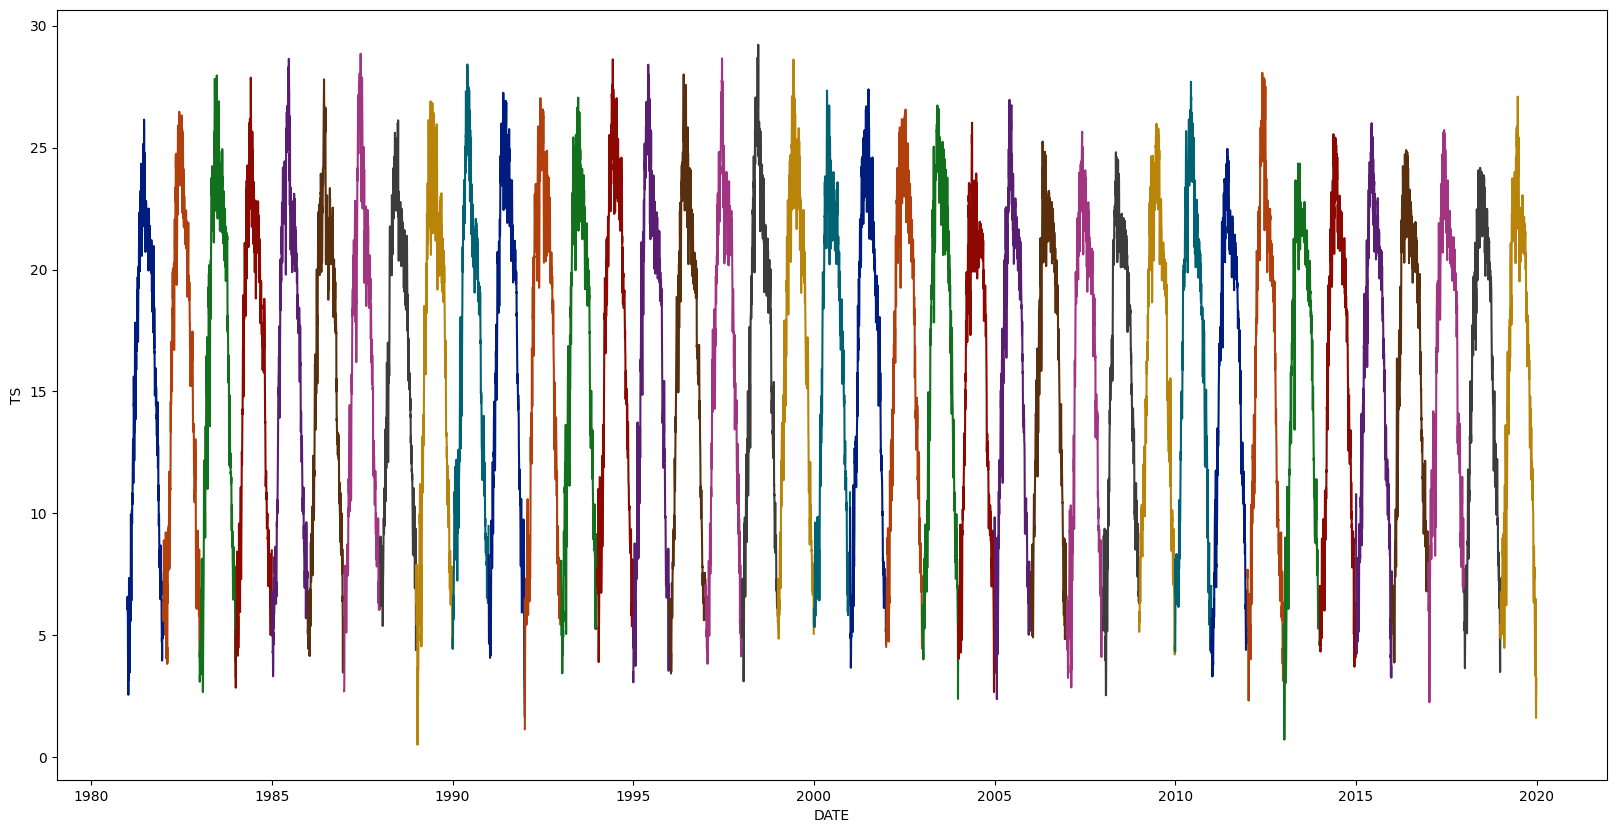

In [ ]:
plot_vars(df,'DATE','TS','YEAR')

In [6]:
# # Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)
df

,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,YEAR,MONTH,DAY
DATE,,,,,,,,,,,,,,,,,,,,,
1981-01-01,Kathmandu,27.7,85.3,0.00,84.02,4.10,47.94,9.04,-1.96,15.71,...,4.35,0.50,3.85,1.75,3.71,0.68,3.03,1981,1,1
1981-01-02,Kathmandu,27.7,85.3,0.00,84.08,4.25,49.83,9.00,-1.47,15.26,...,3.96,0.35,3.62,1.48,3.21,0.33,2.88,1981,1,2
1981-01-03,Kathmandu,27.7,85.3,0.00,84.04,4.72,55.99,8.84,0.11,14.81,...,3.70,0.49,3.21,1.80,3.14,0.65,2.49,1981,1,3
1981-01-04,Kathmandu,27.7,85.3,0.01,83.96,4.78,60.71,7.81,0.27,13.65,...,4.01,0.61,3.40,1.98,3.48,0.89,2.59,1981,1,4
1981-01-05,Kathmandu,27.7,85.3,0.34,83.96,4.67,60.83,7.42,-0.08,12.99,...,3.75,0.37,3.38,2.04,3.44,0.49,2.95,1981,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,Kathmandu,27.7,85.3,0.00,84.01,3.32,54.14,4.21,-5.34,11.10,...,3.69,1.07,2.62,2.00,3.50,1.05,2.45,2019,12,27
2019-12-28,Kathmandu,27.7,85.3,0.00,84.27,3.14,50.06,4.57,-5.45,12.44,...,3.53,0.84,2.69,2.22,3.90,0.96,2.94,2019,12,28
2019-12-29,Kathmandu,27.7,85.3,0.00,84.33,3.33,44.74,7.06,-4.67,13.56,...,3.22,0.80,2.42,1.85,2.55,1.01,1.54,2019,12,29


In [12]:
# Select only the specified columns
df = df[[ 'PS', 'QV2M', 'WS10M','TS','YEAR','MONTH','DAY']]

In [13]:
df

,PS,QV2M,WS10M,TS,YEAR,MONTH,DAY
DATE,,,,,,,
1981-01-01,84.02,4.10,1.74,6.15,1981,1,1
1981-01-02,84.08,4.25,1.53,6.06,1981,1,2
1981-01-03,84.04,4.72,1.71,6.58,1981,1,3
1981-01-04,83.96,4.78,1.86,6.16,1981,1,4
1981-01-05,83.96,4.67,1.82,5.91,1981,1,5
...,...,...,...,...,...,...,...
2019-12-27,84.01,3.32,1.85,1.61,2019,12,27
2019-12-28,84.27,3.14,2.16,2.01,2019,12,28
2019-12-29,84.33,3.33,1.76,2.93,2019,12,29


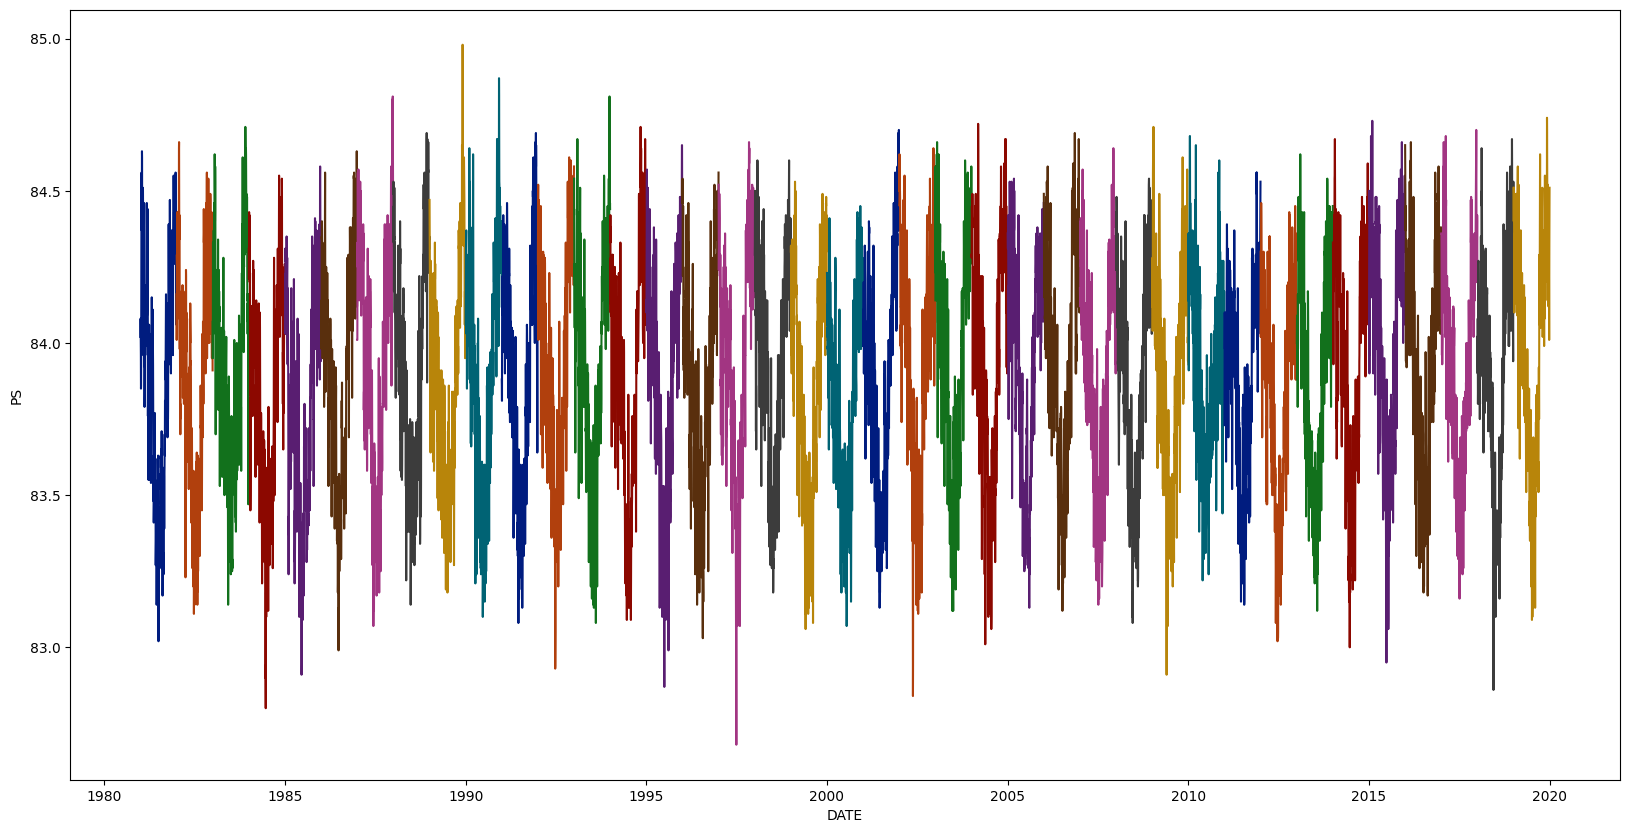

In [ ]:
plot_vars(df,'DATE','PS','YEAR')

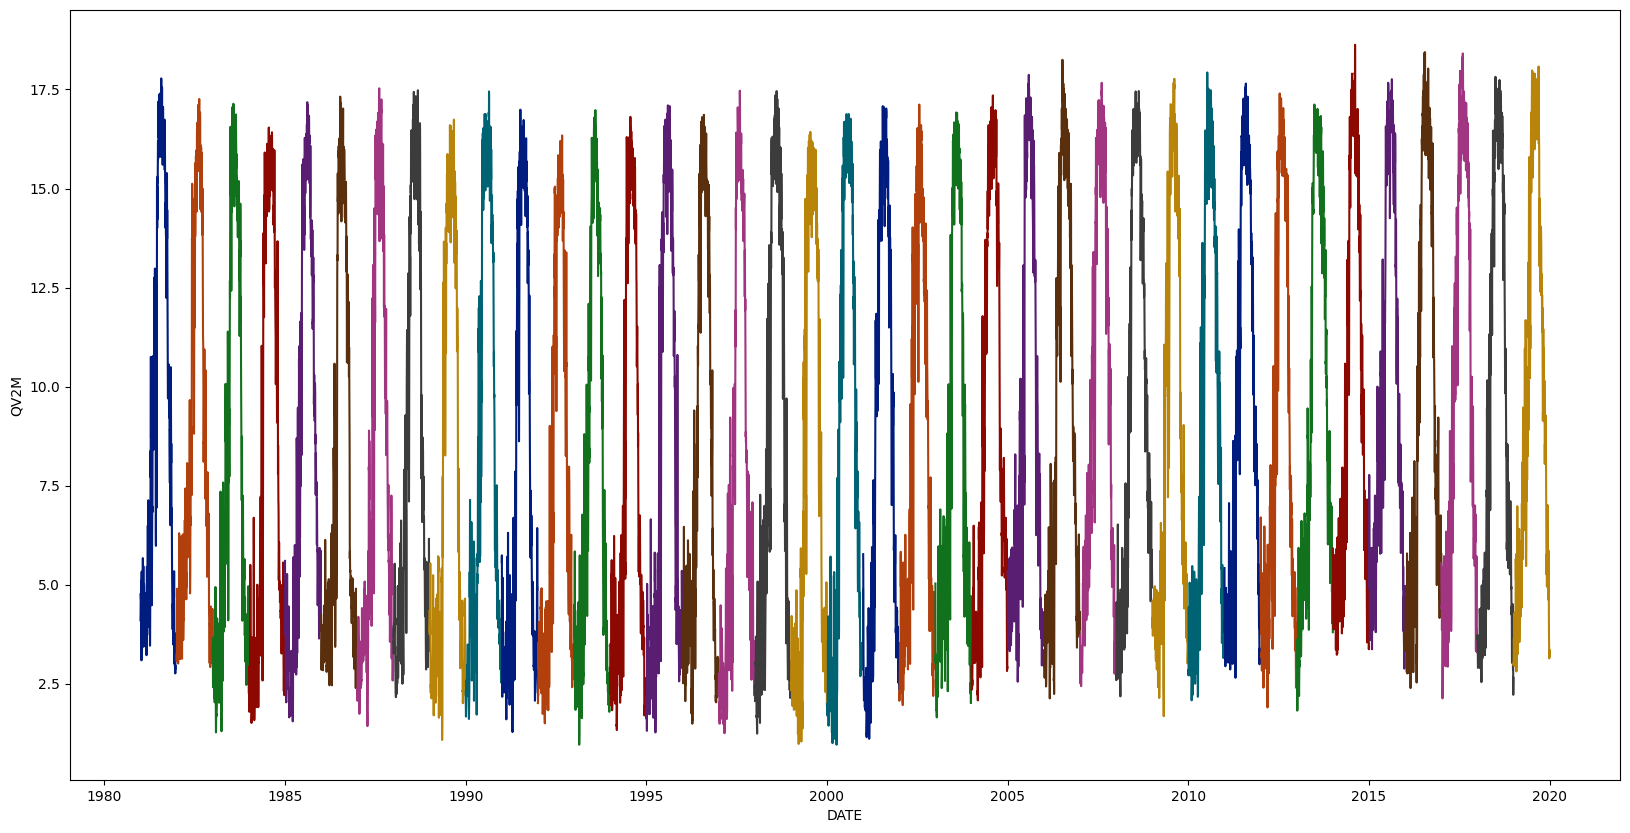

In [ ]:

plot_vars(df,'DATE','QV2M','YEAR')

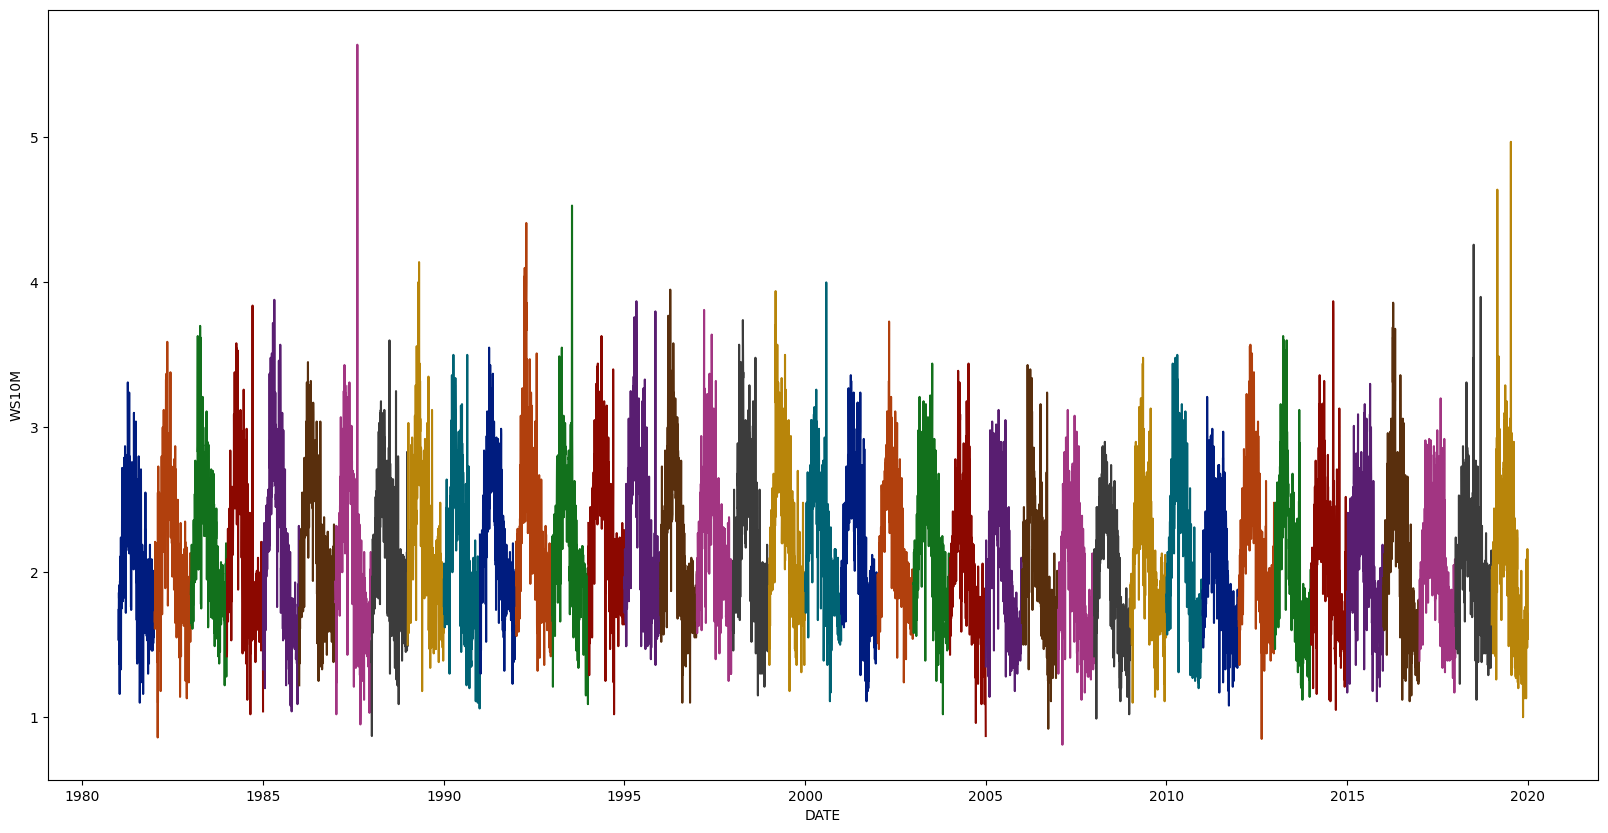

In [ ]:
plot_vars(df,'DATE','WS10M','YEAR')

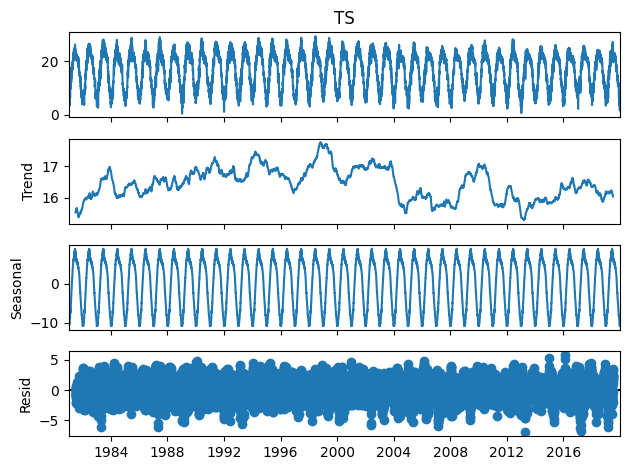

In [17]:
decompose_result = seasonal_decompose(df['TS'],model='additive',period=365)
decompose_result.plot()
plt.show()

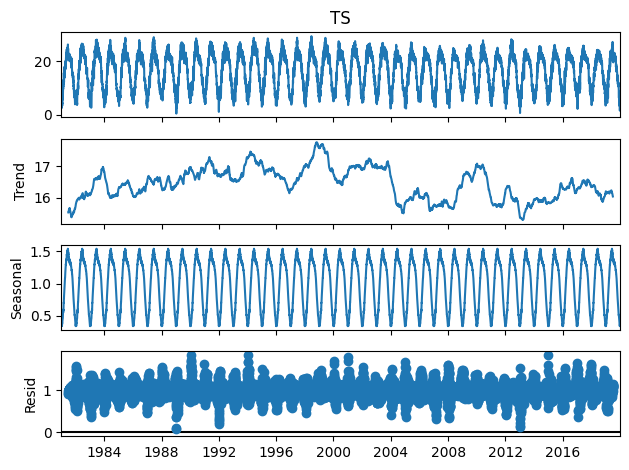

In [18]:
decompose_result = seasonal_decompose(df['TS'],model='multiplicative',period=365)
decompose_result.plot()
plt.show()

In [12]:
x=  df['TS'].values
x

array([6.15, 6.06, 6.58, ..., 2.93, 3.17, 3.23])

In [13]:
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print ('Stationary test:',result[1])

ADF Statistic: -13.579937
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary test: 2.1334846732499173e-25


In [7]:
final_df = df[['TS']]
final_df

,TS
DATE,
1981-01-01,6.15
1981-01-02,6.06
1981-01-03,6.58
1981-01-04,6.16
1981-01-05,5.91
...,...
2019-12-27,1.61
2019-12-28,2.01
2019-12-29,2.93


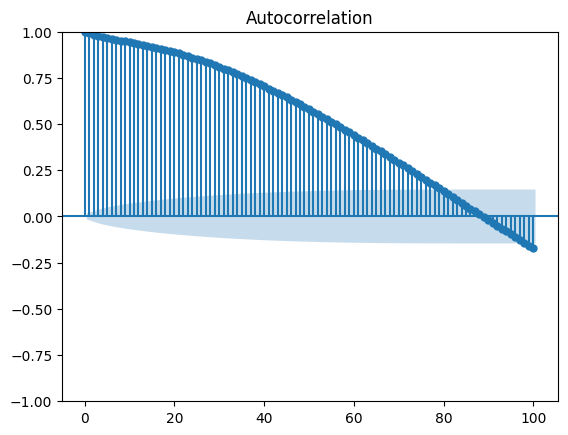

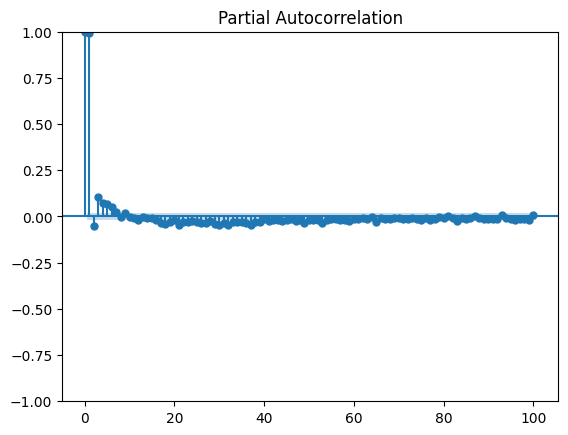

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(final_df,lags=100)
plot_pacf(final_df,lags=100)
plt.show()

In [8]:
train = final_df[0:10000]
test = final_df[10000:]
print('Train Timeseries Range => ', train.index.min(), ' - ' , train.index.max())
print('Test Timeseries Range => ', test.index.min(), ' - ' , test.index.max())

Train Timeseries Range =>  1981-01-01 00:00:00  -  2008-05-18 00:00:00
Test Timeseries Range =>  2008-05-19 00:00:00  -  2019-12-31 00:00:00


In [23]:
sarima_model=SARIMAX(train,order=(1,0,1), seasonal_order=(1,0,1,20),
                                 enforce_stationarity=False, enforce_invertibility=False,)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
sarima_model = sarima_model.fit()

In [25]:
pred_test = sarima_model.predict(start=test.index.min(), end=test.index.max())

In [26]:
pred_test

2008-05-19    24.037704
2008-05-20    24.020775
2008-05-21    23.991200
2008-05-22    23.964515
2008-05-23    23.933587
                ...    
2019-12-27     0.107604
2019-12-28     0.107466
2019-12-29     0.107329
2019-12-30     0.107192
2019-12-31     0.107055
Freq: D, Name: predicted_mean, Length: 4244, dtype: float64

In [27]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred_test,test)
print(mae)

12.66106256146459


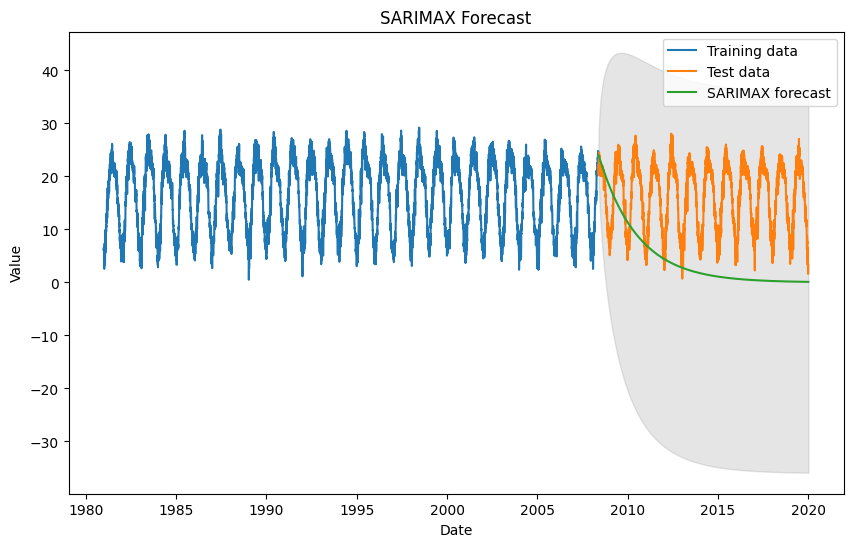

In [28]:
# Assuming sarima_model is already trained and test data is available

# Make predictions on the test data
forecast = sarima_model.get_forecast(steps=len(test))
forecast_index = test.index  # Assuming the test data has DateTimeIndex

# Extract predicted values
predicted_values = forecast.predicted_mean

# Confidence intervals
confidence_intervals = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train, label='Training data')
plt.plot(test, label='Test data')
plt.plot(forecast_index, predicted_values, label='SARIMAX forecast')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
exp_model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=365).\
            fit(smoothing_level=0.1, smoothing_trend=0.1, smoothing_seasonal=0.1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


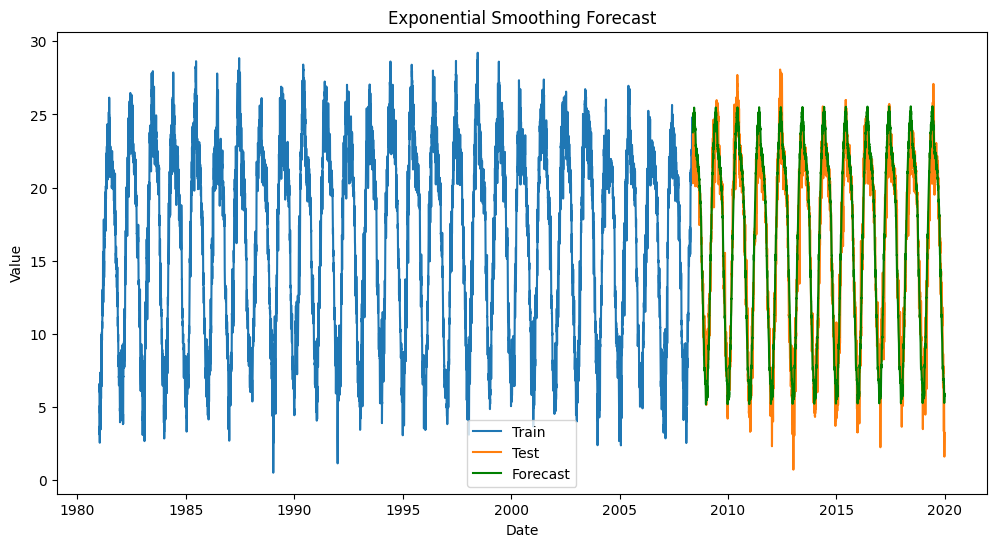

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
exp_model = ExponentialSmoothing(train, trend="add", seasonal="add", 
                                 seasonal_periods=365).fit(smoothing_level=0.1,
                                 smoothing_trend=None, smoothing_seasonal=0.095)

# Generate forecasts
pred = exp_model.forecast(steps=len(test))

# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, pred, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [16]:
pred_test_exp = exp_model.predict(start=test.index.min(), end=test.index.max())
pred_test_exp

2008-05-19    23.780441
2008-05-20    23.830394
2008-05-21    24.114255
2008-05-22    24.313996
2008-05-23    24.348610
                ...    
2019-12-27     5.772401
2019-12-28     5.783721
2019-12-29     5.905934
2019-12-30     5.925439
2019-12-31     5.791997
Freq: D, Length: 4244, dtype: float64

In [17]:
mae=mean_absolute_error(pred_test_exp,test)
print(mae)

1.2082659975428822


In [19]:
r2_score = r2_score(pred_test_exp,test)
r2_score

0.9425295902006932

In [20]:
y_forecast = exp_model.forecast(8030)

In [21]:
y_forecast.index

DatetimeIndex(['2008-05-19', '2008-05-20', '2008-05-21', '2008-05-22',
               '2008-05-23', '2008-05-24', '2008-05-25', '2008-05-26',
               '2008-05-27', '2008-05-28',
               ...
               '2030-05-04', '2030-05-05', '2030-05-06', '2030-05-07',
               '2030-05-08', '2030-05-09', '2030-05-10', '2030-05-11',
               '2030-05-12', '2030-05-13'],
              dtype='datetime64[ns]', length=8030, freq='D')

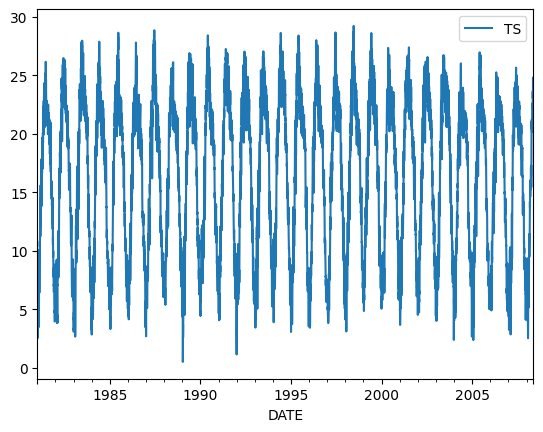

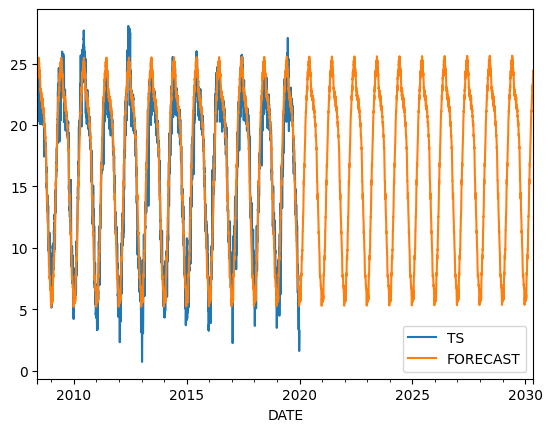

In [22]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
y_forecast.plot(legend=True,label='FORECAST')
plt.show()

In [23]:
end_date = pd.Timestamp('2024-5-18')
print(exp_model.predict(end_date))

2024-05-18    24.451095
Freq: D, dtype: float64


In [90]:
with open('/content/drive/MyDrive/exp_model.pkl', 'wb') as f:
    dill.dump(exp_model, f)